<a href="https://colab.research.google.com/github/kumarUjjawal/deep-learning-with-fastai/blob/master/vision/imagenette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a model on Imagenette with Fastai Library

In [1]:
from fastai.vision.all import *

path = untar_data(URLs.IMAGENETTE_160)

In [2]:
dls = ImageDataLoaders.from_folder(path, valid='val', item_tfms=RandomResizedCrop(129, min_scale=0.35),
                                   batch_tfms= Normalize.from_stats(*imagenet_stats))

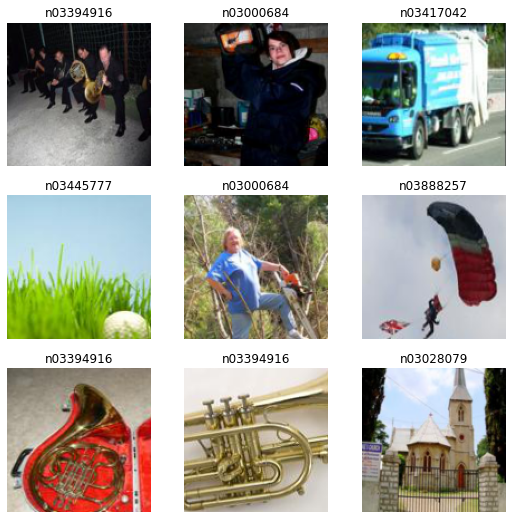

In [3]:
dls.show_batch()

In [4]:
fnames = get_image_files(path)
fnames[0]

Path('/root/.fastai/data/imagenette2-160/val/n03028079/n03028079_71550.JPEG')

In [7]:
dblock = DataBlock()

In [8]:
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_850.JPEG'),
 Path('/root/.fastai/data/imagenette2-160/val/n03888257/n03888257_850.JPEG'))

In [9]:
# assemble items inside data block
dblock = DataBlock(get_items= get_image_files)

In [10]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/root/.fastai/data/imagenette2-160/train/n03425413/ILSVRC2012_val_00018516.JPEG'),
 Path('/root/.fastai/data/imagenette2-160/train/n03425413/ILSVRC2012_val_00018516.JPEG'))

In [11]:
# convert file name to class name

lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

def label_func(fname):
  return lbl_dict[parent_label(fname)]

In [15]:
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = label_func)

In [16]:
dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=217x160, TensorCategory(8))

In [17]:
dsets.vocab

['English springer', 'French horn', 'cassette player', 'chain saw', 'church', 'garbage truck', 'gas pump', 'golf ball', 'parachute', 'tench']

In [19]:
# create a validation set with DataBlock

dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=GrandparentSplitter())

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=160x226, TensorCategory(4))

In [20]:
# specify item and batch transforms
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter= GrandparentSplitter(),
                   item_tfms= RandomResizedCrop(128, min_scale=0.35),
                   batch_tfms= Normalize.from_stats(*imagenet_stats))

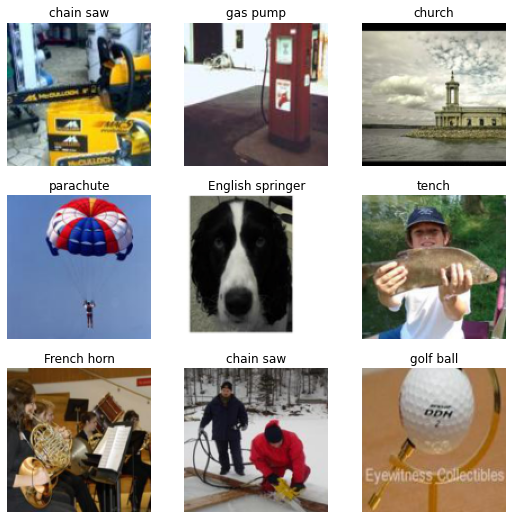

In [21]:
dls = dblock.dataloaders(path)
dls.show_batch()

## Training

In [22]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, pretrained=False)

In [23]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.428583,None,None,00:23
1,2.088685,None,None,00:23
2,1.803676,None,None,00:23
3,1.554600,None,None,00:23
4,1.369509,None,None,00:23


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


SuggestedLRs(lr_min=1.737800812406931e-06, lr_steep=1.0964781722577754e-06)

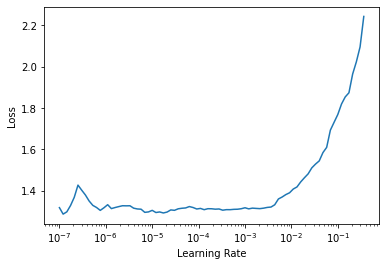

In [24]:
learn.lr_find()

In [25]:
learn = Learner(dls, xresnet34(n_out=10), metrics=accuracy)

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.001737800776027143)

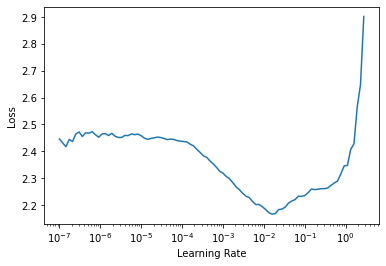

In [26]:
learn.lr_find()

In [27]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.603406,None,None,00:23
1,1.217147,None,None,00:23
2,0.966257,None,None,00:23
3,0.802400,None,None,00:23
4,0.690818,None,None,00:23


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [30]:
learn.show_results()

ValueError: ignored